# Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Training Data

In [2]:
df_train = pd.read_csv("../files/data/SINGLE_CRACK/CORNER_CRACK_COUNTERSUNK_HOLE/CORNER_CRACK_CS1_QUARTER_ELLIPSE_TRAIN.csv")
df_train

,c_index,W/R,a/c,a/t,r/t,b/t,phi,K-T,K-B,K-P
0,0.0,1.6,0.1,0.01,6.000,0.75,0.057972,0.478551,0.277793,0.304652
1,0.0,1.6,0.1,0.01,6.000,0.75,0.069428,0.487040,0.282748,0.310034
2,0.0,1.6,0.1,0.01,6.000,0.75,0.080884,0.496964,0.288399,0.316331
3,0.0,1.6,0.1,0.01,6.000,0.75,0.092340,0.508210,0.294862,0.323450
4,0.0,1.6,0.1,0.01,6.000,0.75,0.103796,0.520393,0.301939,0.331222
...,...,...,...,...,...,...,...,...,...,...
10986363,114447.0,40.0,10.0,0.10,1.333,0.75,1.467062,0.617702,0.344178,0.160868
10986364,114447.0,40.0,10.0,0.10,1.333,0.75,1.478518,0.603543,0.336166,0.157195
10986365,114447.0,40.0,10.0,0.10,1.333,0.75,1.489974,0.590464,0.328740,0.153780
10986366,114447.0,40.0,10.0,0.10,1.333,0.75,1.501431,0.578730,0.322192,0.150703


In [3]:
# Get unique combinations of the first four columns
train_combinations = df_train.iloc[:, 1:5].drop_duplicates().to_numpy()

print(len(train_combinations))

85831


In [4]:
print("Different W/R values: ", np.unique(train_combinations[:,0], axis=0))
print("Different a/c values: ", np.unique(train_combinations[:,1], axis=0))
print("Different a/t values: ", np.unique(train_combinations[:,2], axis=0))
print("Different r/t values: ", np.unique(train_combinations[:,3], axis=0))
print("Different phi values: ", np.unique(df_train.iloc[:,6], axis=0))

Different W/R values:  [  1.6   1.8   2.    2.2   2.4   2.6   2.8   3.2   3.6   4.    4.6   5.2
   5.8   6.4   7.    8.    9.   10.   12.   16.   20.   30.   40.  100. ]
Different a/c values:  [ 0.1     0.125   0.1667  0.2     0.25    0.333   0.5     0.667   0.75
  0.8     0.9     1.      1.1111  1.25    1.333   1.5     2.      3.
  6.     10.    ]
Different a/t values:  [0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1 ]
Different r/t values:  [0.1    0.111  0.125  0.1428 0.25   0.333  0.4    0.4444 0.5    0.5714
 0.667  0.75   0.8    1.     1.25   1.333  1.5    1.75   2.     2.25
 3.     4.     5.     6.     7.     8.     9.    ]
Different phi values:  [0.05792282 0.05793267 0.05794252 0.05795237 0.05796221 0.05797206
 0.06110351 0.06937924 0.06938901 0.06939878 0.06940855 0.06941832
 0.06942809 0.07253527 0.08083565 0.08084534 0.08085504 0.08086473
 0.08087443 0.08088412 0.08396702 0.09229206 0.09230168 0.0923113
 0.09232092 0.09233053 0.09234015 0.09539878 0.10374847 0.10375802
 0.

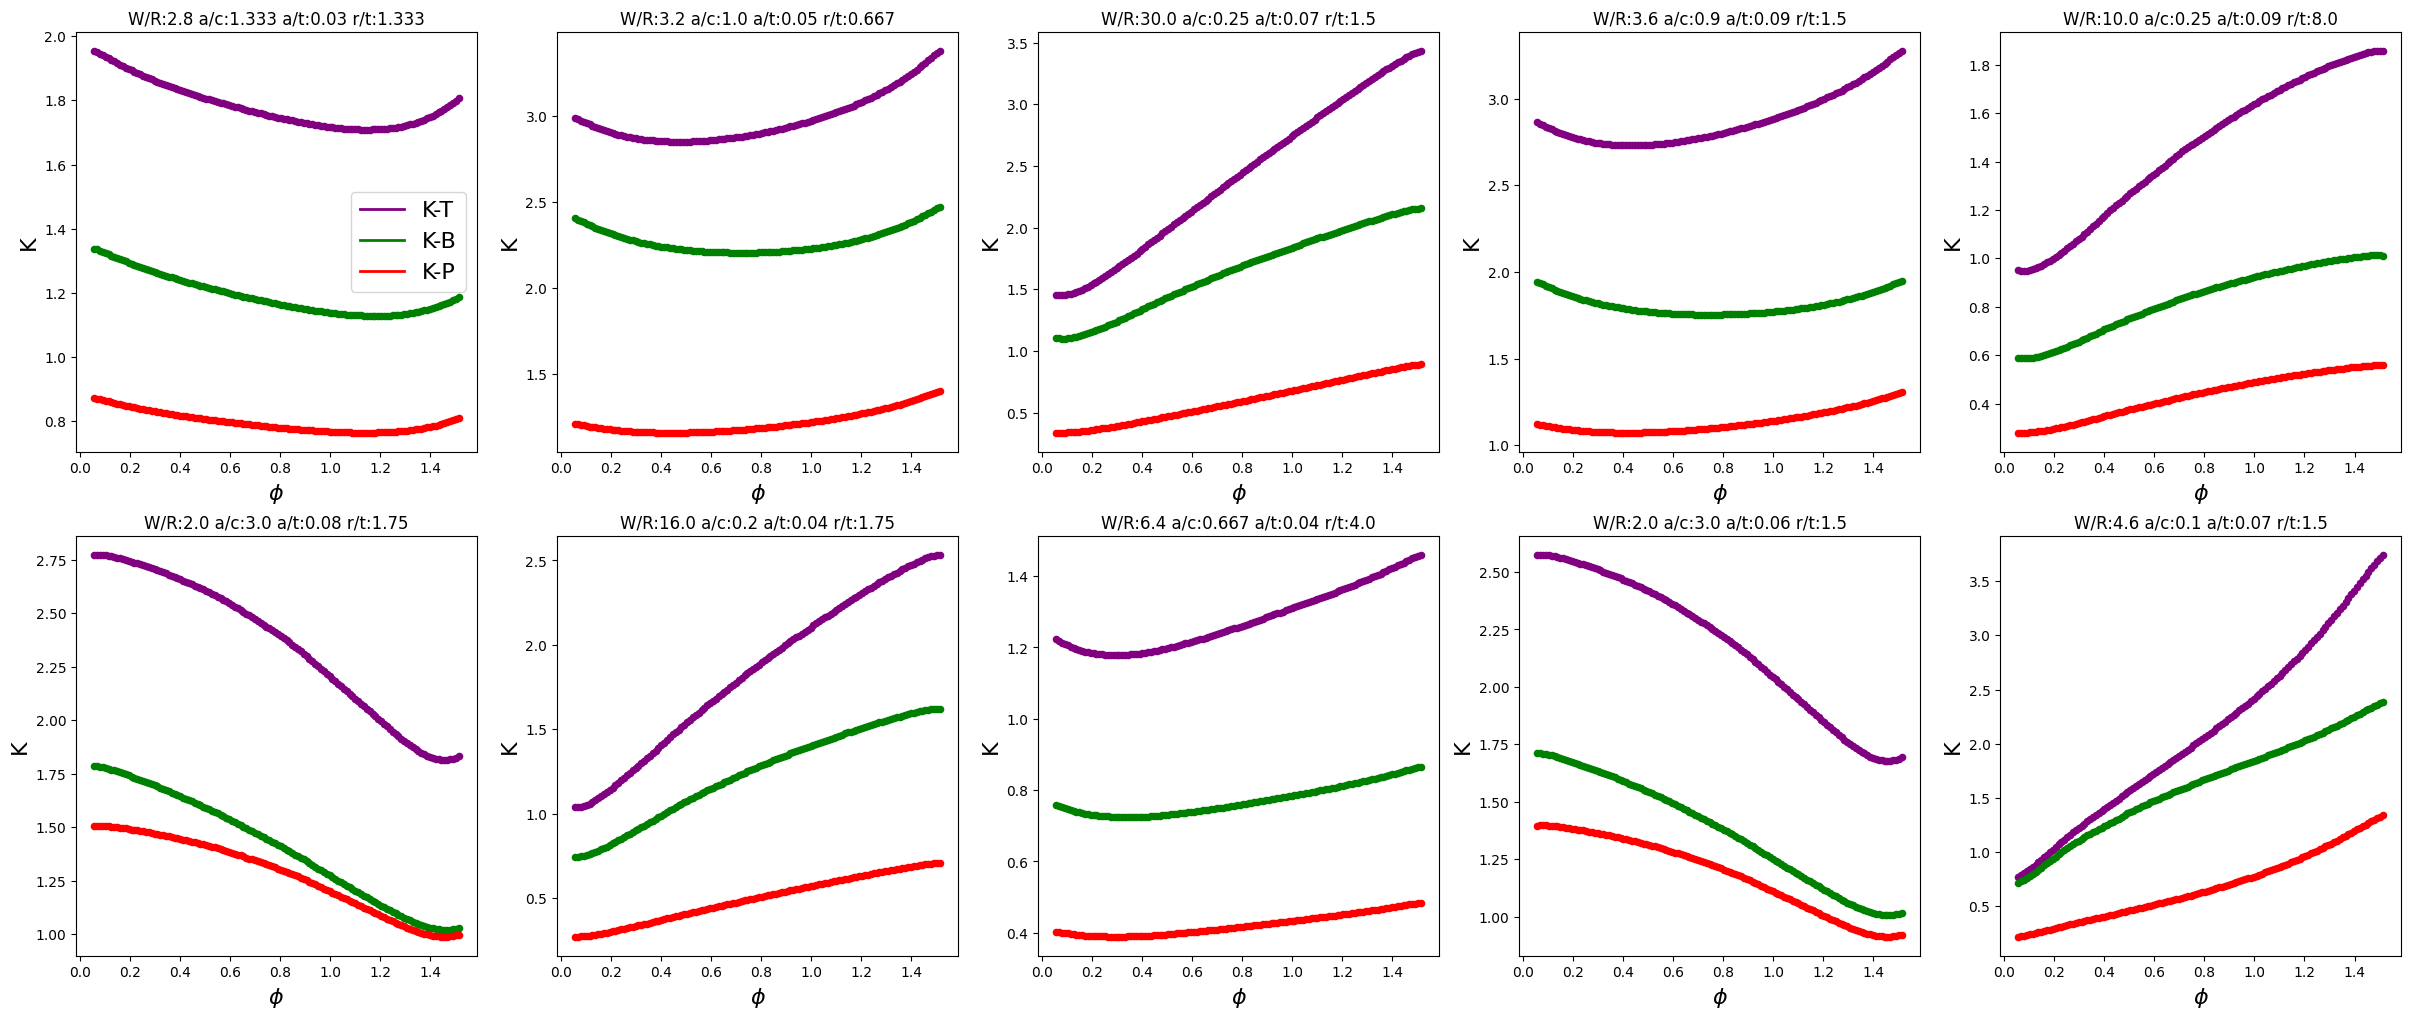

In [5]:
d = df_train.to_numpy()

num_crack = np.unique(d[:,0])

np.random.seed(10)
fig, axs = plt.subplots(2, 5, figsize=(30,12))
for i in range(2):
    for j in range(5):
        idx = np.random.randint(0, len(num_crack))
        data = d[idx*128:idx*128+128]
        W_R = np.unique(data[:,1])
        a_c = np.unique(data[:,2])
        a_t = np.unique(data[:,3])
        r_t = np.unique(data[:,4])

        assert len(W_R) == 1
        assert len(a_c) == 1
        assert len(a_t) == 1
        assert len(r_t) == 1

        axs[i,j].plot(data[:,-4], data[:,-3], label="K-T", color='purple', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-4], data[:,-3], color='purple', s=20)

        axs[i,j].plot(data[:,-4], data[:,-2], label="K-B", color='green', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-4], data[:,-2], color='green', s=20)

        axs[i,j].plot(data[:,-4], data[:,-1], label="K-P", color='red', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-4], data[:,-1], color='red', s=20)

        axs[i,j].set_title("W/R:{} a/c:{} a/t:{} r/t:{}".format(W_R[0], a_c[0], a_t[0], r_t[0]))
        axs[i,j].set_ylabel("K", fontsize=16)
        axs[i,j].set_xlabel(r"$\phi$", fontsize=16)
        
        if i == 0 and j == 0:
            axs[i,j].legend(fontsize=16)

plt.show()

# Testing Data

In [6]:
df_test = pd.read_csv("../files/data/SINGLE_CRACK/CORNER_CRACK_COUNTERSUNK_HOLE/CORNER_CRACK_CS1_QUARTER_ELLIPSE_TEST.csv")
df_test

,c_index,W/R,a/c,a/t,r/t,b/t,phi,K-T,K-B,K-P
0,1.0,1.8,0.1,0.01,6.000,0.75,0.057972,0.412629,0.241125,0.241326
1,1.0,1.8,0.1,0.01,6.000,0.75,0.069428,0.419877,0.245371,0.245570
2,1.0,1.8,0.1,0.01,6.000,0.75,0.080884,0.428424,0.250285,0.250574
3,1.0,1.8,0.1,0.01,6.000,0.75,0.092340,0.438158,0.255969,0.256197
4,1.0,1.8,0.1,0.01,6.000,0.75,0.103796,0.448697,0.262081,0.262356
...,...,...,...,...,...,...,...,...,...,...
3662203,114448.0,100.0,10.0,0.10,1.333,0.75,1.467062,0.617348,0.343517,0.156129
3662204,114448.0,100.0,10.0,0.10,1.333,0.75,1.478518,0.603136,0.335496,0.152533
3662205,114448.0,100.0,10.0,0.10,1.333,0.75,1.489974,0.590064,0.328146,0.149198
3662206,114448.0,100.0,10.0,0.10,1.333,0.75,1.501431,0.578330,0.321592,0.146208


In [7]:
# Get unique combinations of the first four columns
test_combinations = df_test.iloc[:, 1:5].drop_duplicates().to_numpy()

print(len(test_combinations))

28611


In [8]:
print("Different W/R values: ", np.unique(test_combinations[:,0], axis=0))
print("Different a/c values: ", np.unique(test_combinations[:,1], axis=0))
print("Different a/t values: ", np.unique(test_combinations[:,2], axis=0))
print("Different r/t values: ", np.unique(test_combinations[:,3], axis=0))
print("Different phi values: ", np.unique(df_test.iloc[:,6], axis=0))

Different W/R values:  [  1.6   1.8   2.    2.2   2.4   2.6   2.8   3.2   3.6   4.    4.6   5.2
   5.8   6.4   7.    8.    9.   10.   12.   16.   20.   30.   40.  100. ]
Different a/c values:  [ 0.1     0.125   0.1667  0.2     0.25    0.333   0.5     0.667   0.75
  0.8     0.9     1.      1.1111  1.25    1.333   1.5     2.      3.
  6.     10.    ]
Different a/t values:  [0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1 ]
Different r/t values:  [0.1    0.111  0.125  0.1428 0.25   0.333  0.4    0.4444 0.5    0.5714
 0.667  0.75   0.8    1.     1.25   1.333  1.5    1.75   2.     2.25
 3.     4.     5.     6.     7.     8.     9.    ]
Different phi values:  [0.05792282 0.05793267 0.05794252 0.05795237 0.05796221 0.05797206
 0.06937924 0.06938901 0.06939878 0.06940855 0.06941832 0.06942809
 0.08083565 0.08084534 0.08085504 0.08086473 0.08087443 0.08088412
 0.09229206 0.09230168 0.0923113  0.09232092 0.09233053 0.09234015
 0.10374847 0.10375802 0.10376756 0.1037771  0.10378664 0.10379618
 0

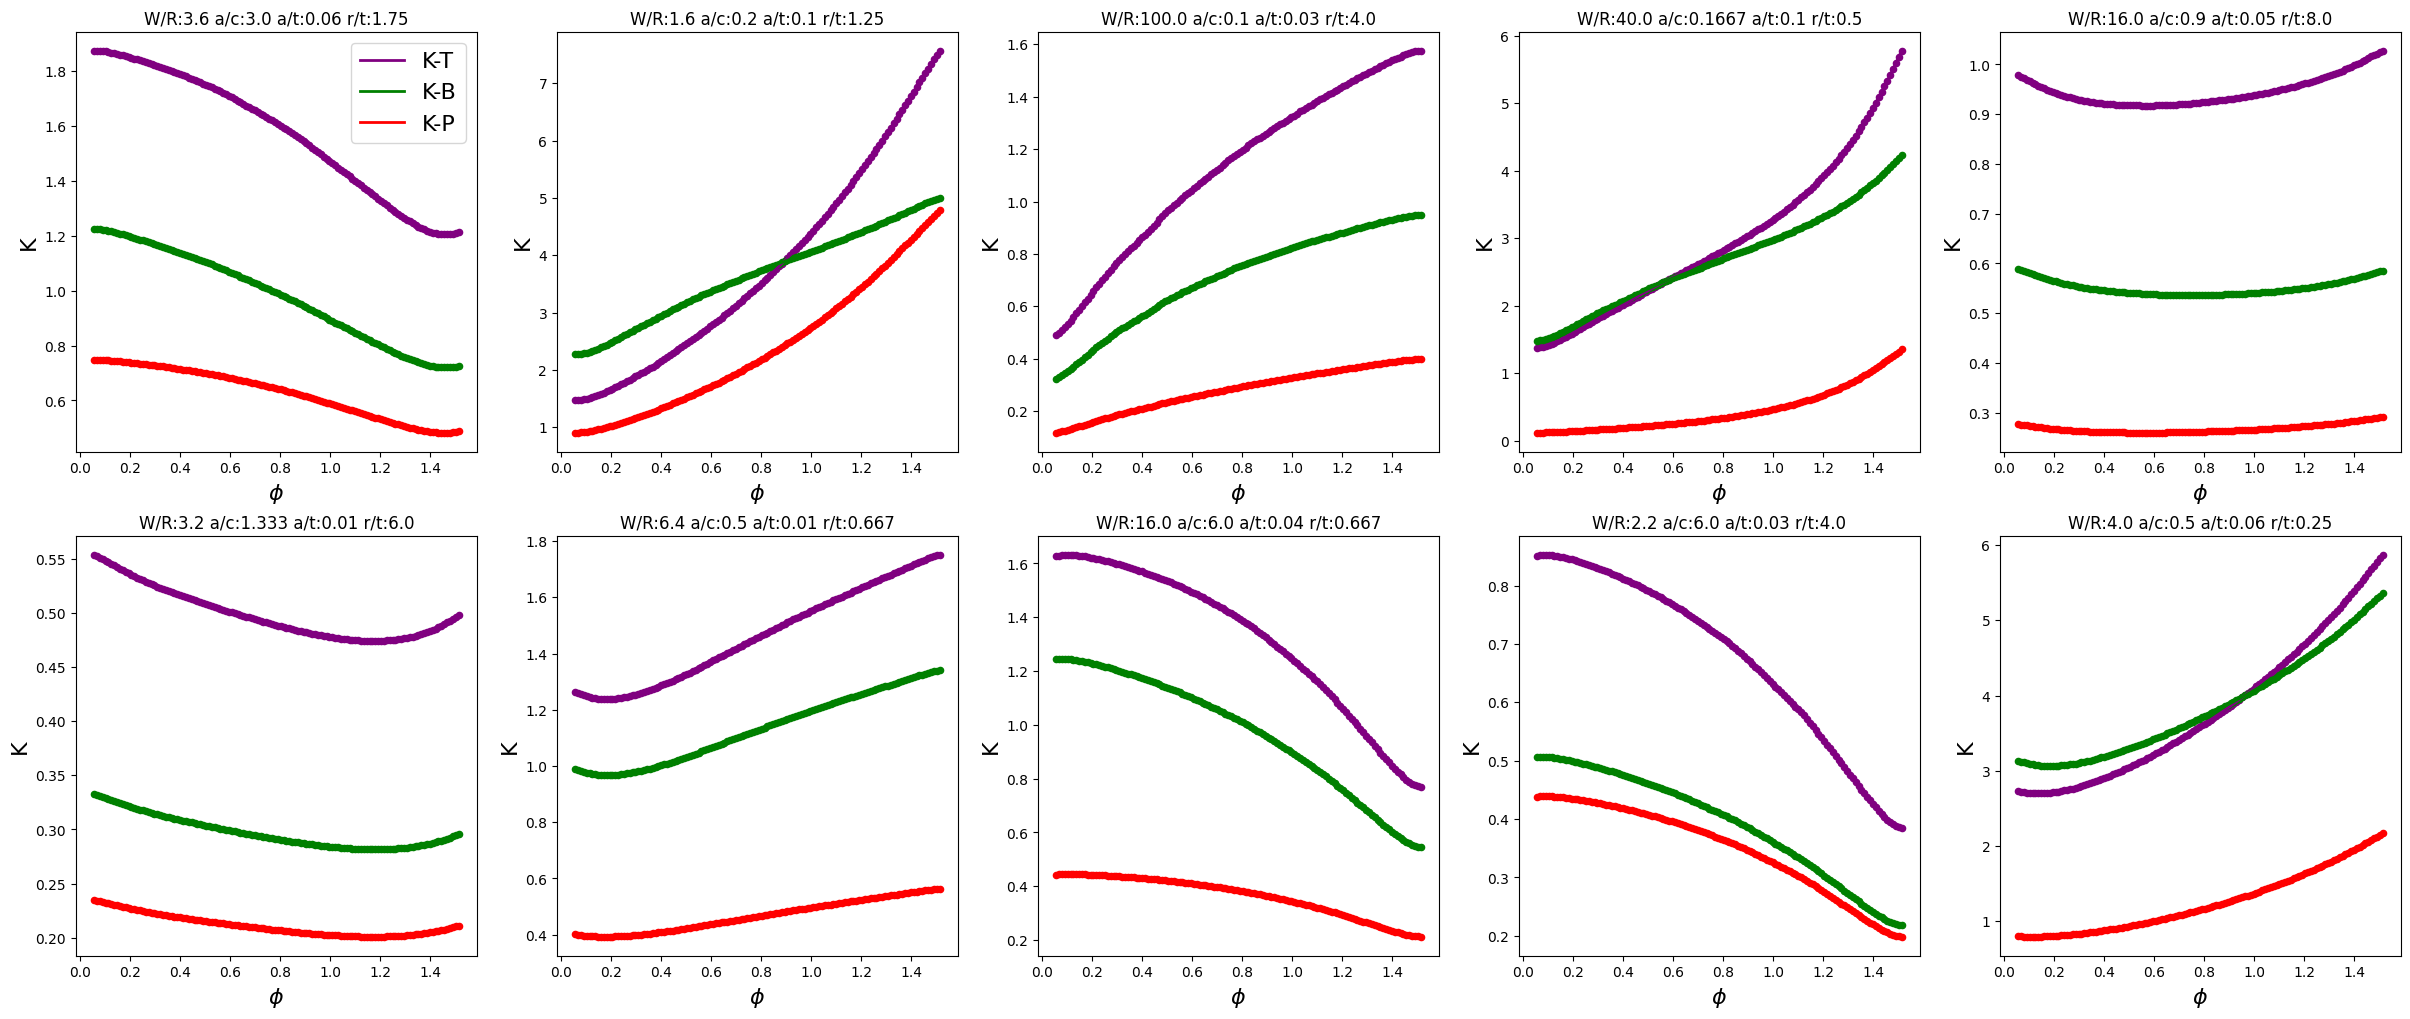

In [9]:
d = df_test.to_numpy()

num_crack = np.unique(d[:,0])

np.random.seed(100)
fig, axs = plt.subplots(2, 5, figsize=(30,12))
for i in range(2):
    for j in range(5):
        idx = np.random.randint(0, len(num_crack))
        data = d[idx*128:idx*128+128]
        W_R = np.unique(data[:,1])
        a_c = np.unique(data[:,2])
        a_t = np.unique(data[:,3])
        r_t = np.unique(data[:,4])

        assert len(W_R) == 1
        assert len(a_c) == 1
        assert len(a_t) == 1
        assert len(r_t) == 1

        axs[i,j].plot(data[:,-4], data[:,-3], label="K-T", color='purple', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-4], data[:,-3], color='purple', s=20)

        axs[i,j].plot(data[:,-4], data[:,-2], label="K-B", color='green', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-4], data[:,-2], color='green', s=20)

        axs[i,j].plot(data[:,-4], data[:,-1], label="K-P", color='red', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-4], data[:,-1], color='red', s=20)

        axs[i,j].set_title("W/R:{} a/c:{} a/t:{} r/t:{}".format(W_R[0], a_c[0], a_t[0], r_t[0]))
        axs[i,j].set_ylabel("K", fontsize=16)
        axs[i,j].set_xlabel(r"$\phi$", fontsize=16)
        
        if i == 0 and j == 0:
            axs[i,j].legend(fontsize=16)

plt.show()